# GRIP : The Sparks foundation

## Data Science and Business Analytics internship

## Creator : Sanjana Acharya

## Task 2: Prediction using unsupervised ML

### From the given dataset 'Iris' ,we have to predict the optimum number of clusters and represent the data visually.

In [13]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline


In [24]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Importing Data

In [4]:
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Step 2: Data Preprocessing

### Removing the last column

In [11]:
iris=df.drop(['Id','Species'],axis=1)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Checking for outliers

<AxesSubplot:xlabel='SepalLengthCm'>

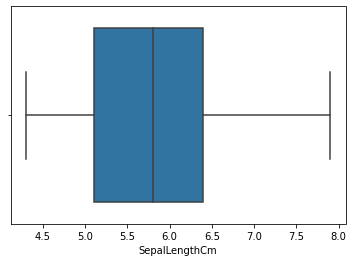

In [14]:
sns.boxplot(x=iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

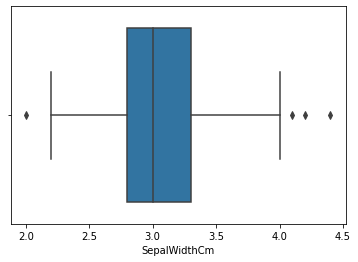

In [15]:
sns.boxplot(x=iris['SepalWidthCm'])

### Treatment of Outliers

In [16]:
for i in ['SepalWidthCm']:
    q3,q1 = np.percentile(iris.loc[ : , i],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
#replacing the outlier values with NaN
    iris.loc[iris[i] < min, i] = np.nan
    iris.loc[iris[i] > max, i] = np.nan

In [17]:
#replacing the NaN values with the mean/average values in the column
iris['SepalWidthCm'].fillna(iris['SepalWidthCm'].mean(), inplace=True)

<AxesSubplot:xlabel='SepalWidthCm'>

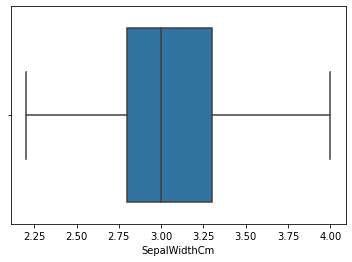

In [18]:
sns.boxplot(x = iris['SepalWidthCm'])

### Observation - The outliers have been successfully removed

## Step 3 : Finding the correlation between attributes

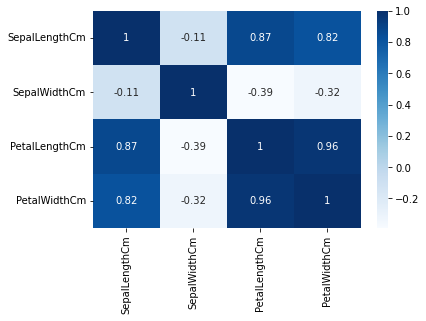

In [19]:
corr = iris.corr()
sns.heatmap(corr, cmap = "Blues", vmax = 1, annot_kws = {'size':10}, annot = True)
#vmax: value to anchor the colourmap
#annot_kws: specifies the size of values displayed in each cell
#annot = True: write the data value in each cell
plt.show()

## Step 4: KMeans Clustering

In [20]:
x = iris.iloc[ : , -2: ].values
#allocating the last 2 columns of 'iris' to 'x' as they're strongly correlated

In [25]:
#to figure out the right number of clusters we use the Within-Cluster-Sum-of-Squares (WCSS) method
#WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids
wcss = [] #this list will collect different wcss values for the clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

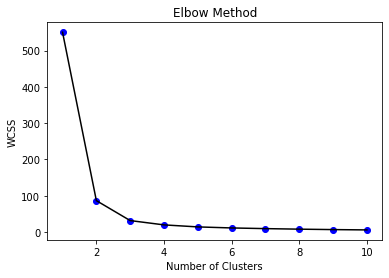

In [22]:
k = range(1, 11)
plt.scatter(k, wcss, c = 'blue')
plt.plot(k, wcss, c = 'black')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### From the above curve we can see that the optimum clusters is where the elbow occurs so it is called as Elbow Method.It occurs when WCSS doesn't decrease significantly with every iteration. Here, we choose the number of clusters as "3".

In [23]:
#set the value of number of clusters to 3 and make predictions
kmeanc = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred = kmeanc.fit_predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


## Step 5 : Visualization of Clusters

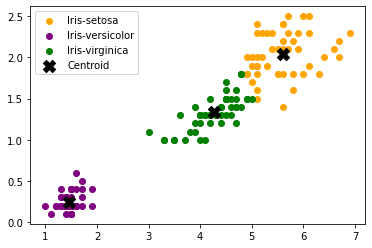

In [26]:
#we use y_pred values' row index as a reference to extract the corresponding rows from x

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'orange', label = 'Iris-setosa') #for cluster 0
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'purple', label = 'Iris-versicolor') #for cluster 1
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], c = 'green', label = 'Iris-virginica') #for cluster 2

#to get centroid we use inbuilt clusters_centers_ function
plt.scatter(kmeanc.cluster_centers_[ : , 0], kmeanc.cluster_centers_[ : , 1], s = 150, c = 'black', label = 'Centroid', marker = 'X')

plt.legend()